In [1]:
# data context and data dictionary

In [2]:
# objective
# You are tasked to analyze and prevent retail customers churn by creating a predictive model to identify 
# customers with a higher propensity to churn.

|Feature|Description|Data Type|
|-----|-----|-----|
|CID|Customer ID|integer
|CreditScore|Credit Score of customer based on the past history|integer|
|Country|Country that customer resides in|string|
|Gender|Gender of Customer|string|
|Age|Age of Customer|integer|
|Tenure|Number of years the customer has been a client with the bank|integer|
|Balance|Customer's savings account balance in the bank|float|
|NumOfProducts|Number of products the customer has purchased through the bank|integer|
|HasCrCard|Whether the customer has a credit card with the bank|binary (1=yes, 0=no)|
|IsActiveMember|Whether the customer is an active member of bank|binary (1=yes, 0=no)|
|EstimatedSalary|Estimated salary of the customer|float|
|Churned|Whether the customer left the bank (target variable)|binary (1=yes, 0=no)|

***

In [3]:
#!pip install xgboost

In [4]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Machine Learning Models
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

# model evaluation
from sklearn import metrics

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# taking care of warnings
import warnings
warnings.filterwarnings("ignore")

***

In [5]:
# read data
df = pd.read_csv("bank_churn.csv")

In [6]:
# view data
df.head()

,CID,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***

In [7]:
# get info
#1. structure of data
#2. describe data
#3. missing values
#4. duplicate values
#5. categorical variables - count of categories, unique values
#6. variance of variables
#7. correlation of variables

In [8]:
# get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CID              10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Country          10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Churned          10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.shape

(10000, 12)

In [36]:
# get descriptive stats
df.describe().T # for continuous variables

,count,mean,std,min,25%,50%,75%,max
CID,10000.0,690940.569400,71936.186123,565701.00,628528.25,690738.000,753233.7500,815690.00
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churned,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
# get descriptive stats
df.describe(include = "O").T # for categorical variables

,count,unique,top,freq
Country,10000,3,France,5014
Gender,10000,2,Male,5457


In [12]:
# get and update data structure

In [13]:
# show all column names
df.columns

Index(['CID', 'CreditScore', 'Country', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churned'],
      dtype='object')

In [14]:
df['Country'].value_counts()

Country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [37]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [16]:
# missing values

In [17]:
# check for missing values
df.isnull().sum()

CID                0
CreditScore        0
Country            0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64

In [18]:
# no missing values -> no need to impute or drop columns

In [19]:
# duplicates

In [20]:
# check for duplicates
df.duplicated().sum()

0

In [21]:
# no missing values
# no duplicate values
# no need to replace anything with 'nan'

***

In [ ]:
# explore data

In [23]:
# Calculate first and third quartile
first_quartile = df['Tenure'].describe()['25%']
third_quartile = df['Tenure'].describe()['75%']

In [24]:
# Interquartile range
iqr = third_quartile - first_quartile

In [25]:
# Remove outliers
df2 = df[(df['Tenure'] > (first_quartile - 3 * iqr)) &
         (df['Tenure'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI distribution')

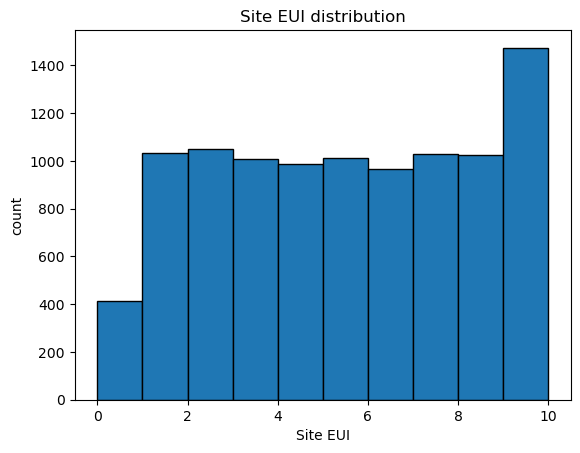

In [30]:
#figsize(8, 8)
plt.hist(df2['Tenure'],
        bins=10,
        edgecolor='black');
plt.xlabel('Tenure');
plt.ylabel('count');
plt.title('Tenure'')

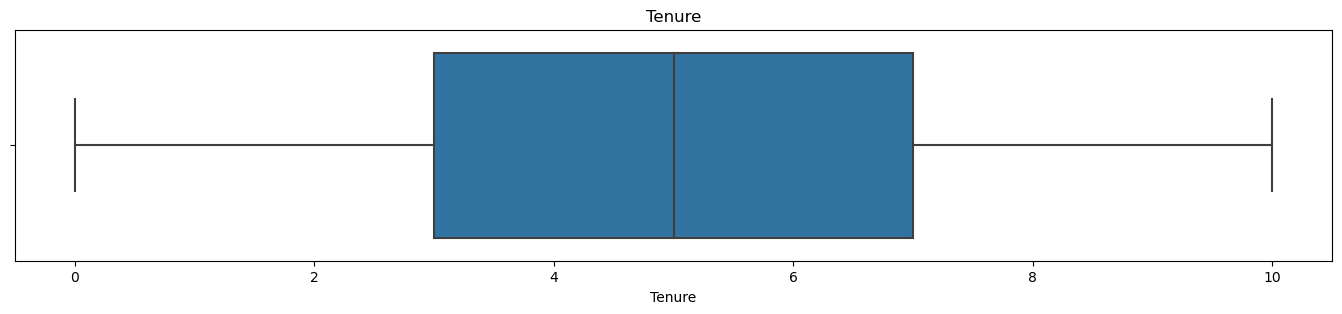

In [32]:
# check outliers in `tenure`
plt.figure(figsize=(17,3))
plt.title('Tenure')
sns.boxplot(data=None, x=df['Tenure'], fliersize=1);

In [33]:
# determine the number of rows containing outliers
# calculate the 25th percentile value in `tenure`
percentile25 = df['Tenure'].quantile(0.25)

# calculate the 75th percentile value in `tenure`
percentile75 = df['Tenure'].quantile(0.75)

# calculate the interquartile range in `tenure`
iqr = percentile75 - percentile25

# define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")

# identify subset of data containing outliers in `tenure`
outliers = df[(df['Tenure'] > upper_limit) | (df['Tenure'] < lower_limit)]

# count how many rows in the data contain outliers in `tenure`
print(f"Number of rows in the data containing outliers in `tenure`: {len(outliers)}")

Lower limit: -3.0
Upper limit: 13.0
Number of rows in the data containing outliers in `tenure`: 0


In [ ]:
# check variance
# check correlation

In [38]:
df_num = df.select_dtypes(exclude='O')
df_cont = df_num.drop(columns = ['CID','HasCrCard','IsActiveMember','Churned'])

In [39]:
df_cont.var()

CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
EstimatedSalary    3.307457e+09
dtype: float64

In [41]:
df_corr = df_cont.corr()

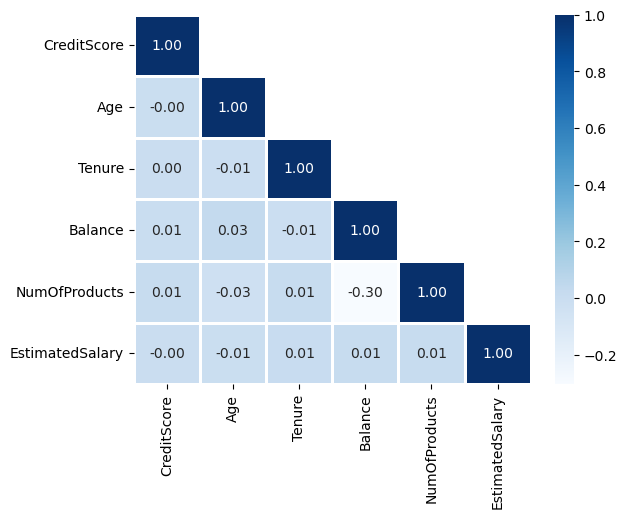

In [42]:
m = np.ones_like(df_corr)
m[np.tril_indices_from(m)]=0
sns.heatmap(df_corr, annot=True, fmt = '.2f', linewidths=2, linecolor='white', cmap = 'Blues', mask=m)
plt.show()

In [ ]:
# explore class difference

In [ ]:
df['Churned'].value_counts(normalize=True)

In [ ]:
import plotly.express as px

fig = px.bar(df['Churned'].value_counts(), width=800, height=500)
fig.show()

In [ ]:
# some class imbalance -> will use the stratify=y parameter when splitting the data later 

***

In [ ]:
# feature engineering

***

In [ ]:
# machine learning models: (hyperparameter tuning not yet taught so lets not do gridsearchcv cos im lazy)
# 1. Single: Logistic Regression
# 2. Single: Decision Tree
# 3. Single: SVM
# 4. Ensemble: Random Forest
# 5. Ensemble: Gradient Boost
# 6. Ensemble: XGBoost

In [ ]:
# select features
features = ['CreditScore', 
            'Age', 
            'Tenure', 
            'Balance', 
            'NumOfProducts', 
            'HasCrCard', 
            'IsActiveMember', 
            'EstimatedSalary']

# separate into features / outcome
X = df[features]
y = df['Churned']

# train test split
# stratifying the split because the class weight is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 1. logistic regression

In [ ]:
# logistic regression - no tuning
# Instantiate model object and fit model
log_reg = LogisticRegression(max_iter=300)
log_reg_model = log_reg.fit(X_train, y_train)

# Perform prediction with the model
y_pred = log_reg_model.predict(X_test)

# Then we pass in the test outcome and the predicted outcome to get the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# logistic regression with crossvalidation
# Split the data into ten set
kf = KFold(n_splits=10)

# Create logistic regression object
log_reg = LogisticRegression(max_iter=300)

# List of accuracy for each fold
k_fold_accuracy = []

# Iterate through each fold and calculate the RMSE for each fold
for train_index, test_index in kf.split(X):
    
    # Extract the training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model
    log_reg_model = log_reg.fit(X_train, y_train)
    y_pred = log_reg_model.predict(X_test)
    
    #Calculate Accuracy for the fold and append it
    accuracy = metrics.accuracy_score(y_test, y_pred)
    k_fold_accuracy.append(accuracy)
    
print('The accuracy for each fold is:', k_fold_accuracy)
print('The average accuracy is:', statistics.mean(k_fold_accuracy))

In [ ]:
# 2. single decision tree

In [ ]:
# single decision tree - no tuning
# Instantiate model object and fit model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train,y_train)

# Perform prediction with the model
y_pred = decision_tree_classifier.predict(X_test)

# Then we pass in the test outcome and the predicted outcome to get the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# decision tree with kfold cross validation
# Split the data into ten set
kf = KFold(n_splits=5)

# Create SVM model object
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# List of RMSE for each fold
k_fold_Accuracy = []

# Iterate through each fold and calculate the RMSE for each fold
for train_index, test_index in kf.split(X):
    
    # Extract the training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model
    decision_tree_classifier_model = decision_tree_classifier.fit(X_train,y_train)
    y_pred = decision_tree_classifier_model.predict(X_test)
    
    #Calculate RMSE for the fold and append it
    accuracy = metrics.accuracy_score(y_test, y_pred)
    k_fold_Accuracy.append(accuracy)
    
print('The Accuracy for each fold is:', k_fold_Accuracy)
print('The average accuracy is:', statistics.mean(k_fold_Accuracy))

In [ ]:
# 3. single svm

In [ ]:
# single svm - no tuning
# Instantiate model object and fit model
svm_classifier = svm.SVC(C=1)
svm_classifier.fit(X_train,y_train)

# Perform prediction with the model
y_pred = svm_classifier.predict(X_test)

# Then we pass in the test outcome and the predicted outcome to get the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# svm with kfold crossvalidation
import statistics

# Split the data into ten set
kf = KFold(n_splits=10)

# Create SVM model object
svm_classifier = svm.SVC(C=1)

# List of RMSE for each fold
k_fold_Accuracy = []

# Iterate through each fold and calculate the RMSE for each fold
for train_index, test_index in kf.split(X):
    
    # Extract the training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model
    svm_classifier_model = svm_classifier.fit(X_train,y_train)
    y_pred = svm_classifier_model.predict(X_test)
    
    #Calculate RMSE for the fold and append it
    accuracy = metrics.accuracy_score(y_test, y_pred)
    k_fold_Accuracy.append(accuracy)
    
print('The Accuracy for each fold is:', k_fold_Accuracy)
print('The average accuracy is:', statistics.mean(k_fold_Accuracy))

In [ ]:
# 4. random forest

In [ ]:
# Instantiate the model object
model = RandomForestClassifier(random_state=5)

# Fit the model with the training data
model.fit(X_train, y_train)
print('Number of Trees used : ', model.n_estimators) # Find out number of trees used

# Predict the target on the test dataset
y_predict = model.predict(X_test)
#print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)

In [ ]:
# 5. gradient boost

In [ ]:
# instantiate model
model = GradientBoostingClassifier(learning_rate=0.01,random_state=5)

# fit model
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
#print('\nPrediction on test data', y_predict) 

accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)

In [ ]:
# 6. xgboost

In [ ]:
# Instantiate the model object
model = xgb.XGBClassifier(learning_rate=0.1, random_state=5)

# Fit the model with the training data
model.fit(X_train, y_train)

# predict the target on the test dataset
y_predict = model.predict(X_test)
print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)

***

In [ ]:
# evaluate models